### **`DropOut Regression Problem`**

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

### Generate data

In [34]:
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

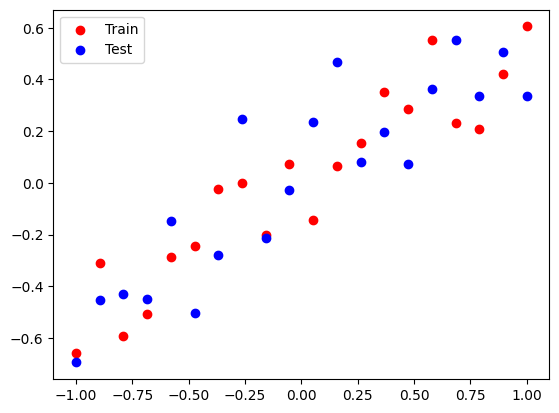

In [35]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

### Regression model

In [36]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='linear'))
adam = Adam(learning_rate = 0.01)
model_1.compile(loss = 'mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=False)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# evaluate the model
_,train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_,test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print("Train: {}, test: {}".format(train_mse, test_mse))

Train: 0.00441171508282423, test: 0.0459987111389637


In [38]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


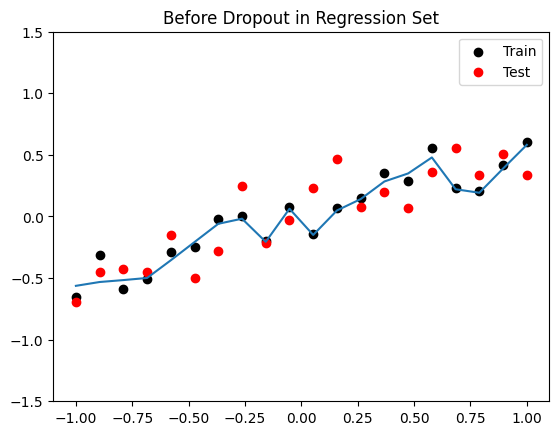

In [39]:
plt.figure()
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.title("Before Dropout in Regression Set")
plt.ylim((-1.5,1.5))
plt.show()

Text(0.5, 1.0, 'Before Dropout in Regression Set')

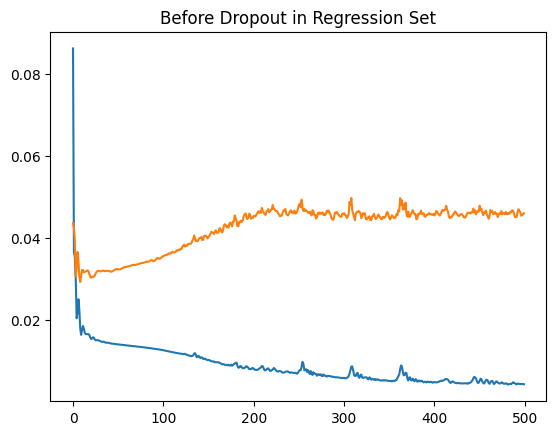

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Before Dropout in Regression Set")


### Dropout model

In [41]:
model = Sequential()
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
adam = Adam(learning_rate = 0.01)
model.compile(loss = 'mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=False)

In [42]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.014137141406536102, Test: 0.034879185259342194


In [43]:
y_pred_2 = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


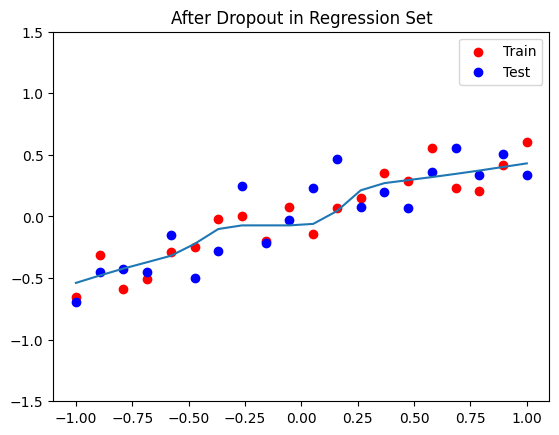

In [44]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.title("After Dropout in Regression Set")
plt.show()

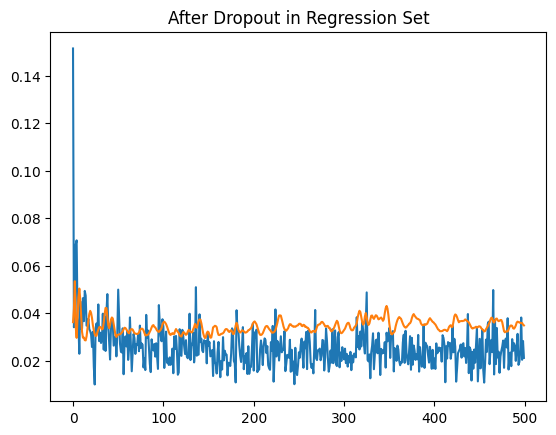

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("After Dropout in Regression Set")
plt.show()